<a href="https://colab.research.google.com/github/Airee66/MAT421/blob/main/ModuleH_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 22: Ordinary Differential Equation - Initial Value Problems
### Ainsley Chapman
### Date: 4/9/2023

## Section 22.4 - Numerical Error and Instability

##### Accuracy - Ability to get close to the exact solution
##### Stability - Ability to minimize integration error over time


Below the Euler Explicit, Euler Implicit, and Trapezoidal Formulas are used in python to solve the pendulum equation over the time interval [0,6] in increments of 0.1 and for an initial solution of $ S_0 = \left[\begin{array}{c} 1 \\0 \end{array}\right] $. For the model parameters using $ \sqrt{\frac{g}{l}} = 5 $

<ipython-input-1-b640e28511e3>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


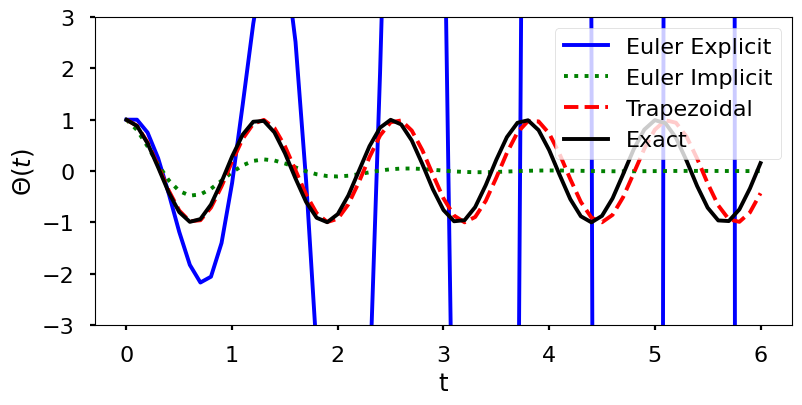

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline 

# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 6.1, h)
# oscillation freq. of pendulum
w = 5
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])
    
plt.figure(figsize = (9, 4))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Euler Explicit', 'Euler Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

## Section 22.5 - Predictor-Corrector and Runge Kutta Methods

### Predictor Correction Methods - Midpoint Method

Midpoint Predictor Step:
$ S\left(t_{j} + \frac{h}{2}\right) = S(t_j) + \frac{h}{2}F(t_j, S(t_j)) $

Corrector Step:
$ S(t_{j+1}) = S(t_j) + hF\left(t_j + \frac{h}{2}, S\left(t_{j} +
\frac{h}{2}\right)\right) $

### Runge Kutta Methods
- One of the most widely used methods for solving Ordinary Differential Equations (ODEs)

$$ S(t_{j+1}) = S(t_j + h) = S(t_j) + S'(t_j)h + \frac{1}{2!}S''(t_j)h^2 + \cdots + \frac{1}{n!}S^{(n)}(t_j)h^n $$

- Accuracy of the approximation is increased as more terms in the series are used as compared to the Euler method: $ S(t_{j+1}) = S(t_j + h) = S(t_j) + h \cdot S'(t_j)$


### Second Order Runge Kutta Method

\begin{eqnarray*}
k_1 & = & F(t_j,S(t_j))\\
k_2 & = & F\left(t_j+ph, S(t_j)+qhk_1\right)\\
\end{eqnarray*}

Where we will have:
$$ S(t_{j+1}) = S(t_j) + \frac{1}{2}(k_1+k_2)h $$

### Fourth Order Runge Kutta Method

\begin{split}
\begin{eqnarray*}
k_1 & = & F(t_j,S(t_j))\\
k_2 & = & F\left(t_j+\frac{h}{2},S(t_j)+\frac{1}{2}k_1h\right)\\
k_3 & = & F\left(t_j+\frac{h}{2},S(t_j)+\frac{1}{2}k_2h\right)\\
k_4 & = & F(t_j+h,S(t_j)+k_3h)
\end{eqnarray*}
\end{split}

Where we will have:

$$ S(t_{j+1}) = S(t_j) + \frac{h}{6}\left(k_1 + 2k_2 + 2k_3 + k_4\right) $$


## Section 22.6 - Python ODE Solvers

$$ \frac{dS(t)}{dt}=\cos(t) $$
For initial value $ S_0 = 0 $

<ipython-input-2-2374c8a9dfa9>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


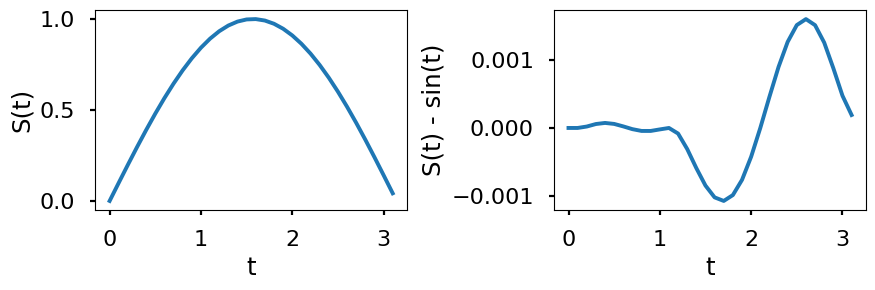

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (9, 3))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

Monitoring difference between approximate and exact solution using atol and rtol:

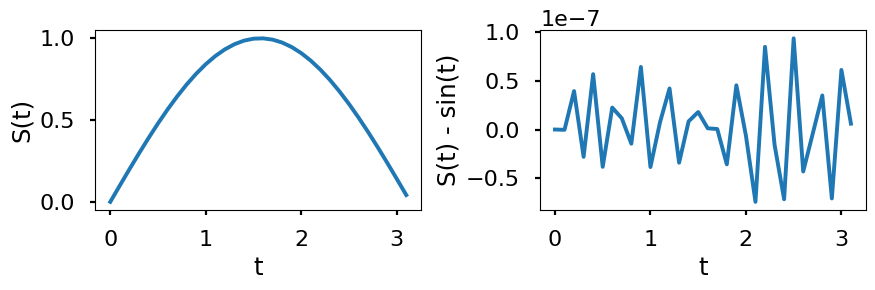

In [3]:
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
                rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (9, 3))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

$$ \frac{dS(t)}{dt} = -S(t) $$


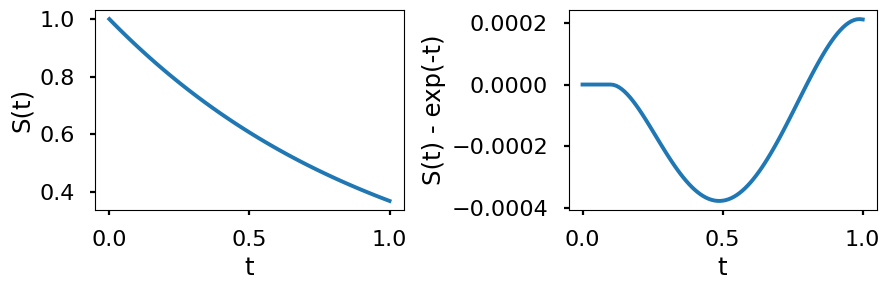

In [4]:
F = lambda t, s: -s

t_eval = np.arange(0, 1.01, 0.01)
sol = solve_ivp(F, [0, 1], [1], t_eval=t_eval)

plt.figure(figsize = (9, 3))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.exp(-sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - exp(-t)')
plt.tight_layout()
plt.show()

System: $$ S(t) = \left[\begin{array}{c} x(t) \\y(t) \end{array}\right] $$


Evolution of the system is defined by the ODE:

\\begin{split}
\frac{dS(t)}{dt} = \left[\begin{array}{cc}
0 & t^2 \\
-t & 0
\end{array}\right]S(t).
\end{split}

Solve for time interval $ [0, 10] $ and initial value $ S_0 = \left[\begin{array}{c} 3 \\1 \end{array}\right] $

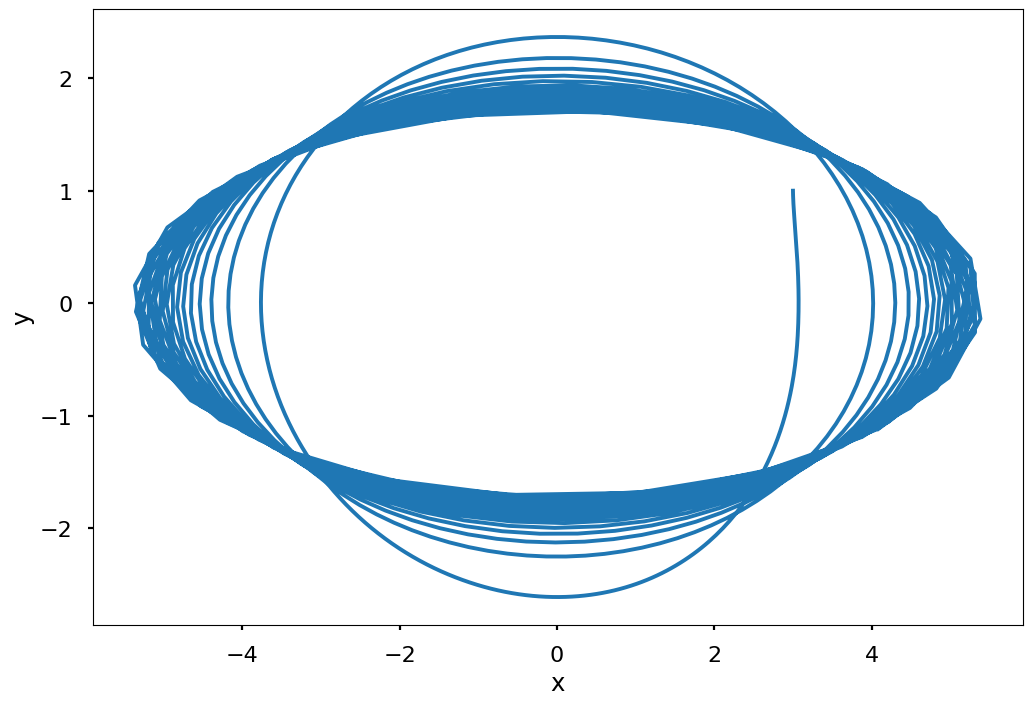

In [13]:
F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [3, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()